In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
full = cv2.imread("../DATA/sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

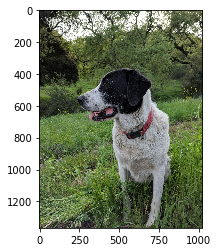

In [4]:
plt.imshow(full)

In [6]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

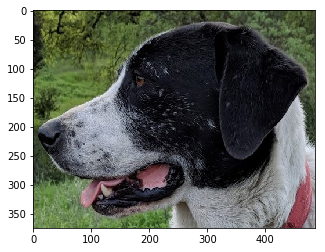

In [7]:
plt.imshow(face)

In [8]:
face.shape

(375, 486, 3)

In [21]:
# The Full Image to Search
calc = cv2.imread('../DATA/lcd_calc.jpg')
calc = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('../DATA/lcd_x.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

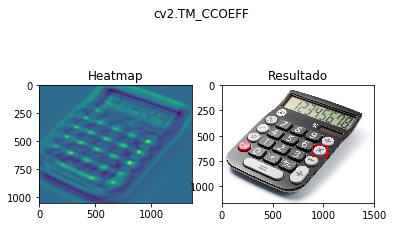

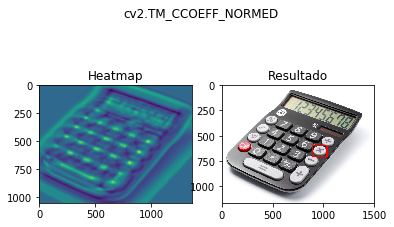

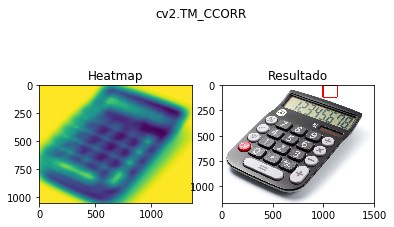

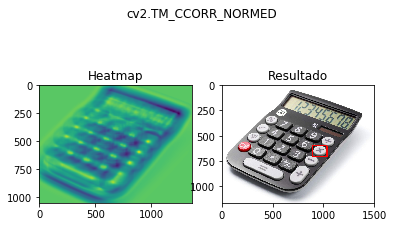

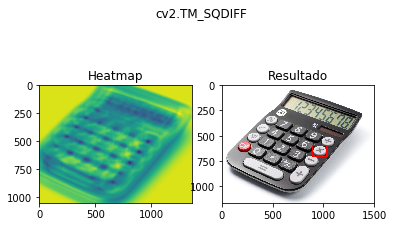

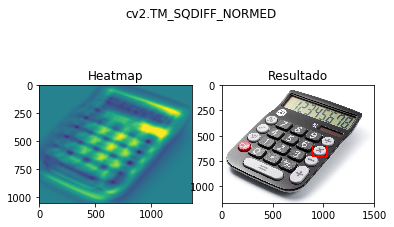

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Imagem da calculadora
calc = cv2.imread('../DATA/lcd_calc.jpg')
calc = cv2.cvtColor(calc, cv2.COLOR_BGR2RGB)

#Imagem do botão
button= cv2.imread('../DATA/lcd_x.jpg')
button = cv2.cvtColor(button, cv2.COLOR_BGR2RGB)

#Lista de todos os metodos para comparação. Estão como uma lista de string. Iremos utilizar o eval para converter em método.
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for m in methods:
       #Cria uma cópia da imagem. Precisamos dela, pois iremos desenhar sobre a imagem.
    full_copy = calc.copy()

       #converte a string da lista para método.
    method = eval(m)

       #Realiza a busca com matchTemplate. Retorna e armazena em "res"
    res = cv2.matchTemplate(full_copy, button, method)

       #Encontra a localização para desenhar o quadrado.
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc #(x,y)
    else:
        top_left = max_loc

       #Pega as propriedades da imagem inicial
    height, width, channels = button.shape

       #Define os quadrantes
    botton_right = (top_left[0]+ width, top_left[1]+height)

       #Desenha o quadrado
    cv2.rectangle(full_copy, top_left, botton_right, (255,0,0), 10)

       #Faz a plotagem
    plt.subplot(121)
    plt.imshow(res) #Imagem de cinza
    plt.title("Heatmap")

    plt.subplot(122)
    plt.imshow(full_copy) #Imagem com o quadrante
    plt.title("Resultado")

    plt.suptitle(m) #Adiciona o método como título
    
    plt.show() #Exibe o resultado